# **INTRODUCTION**
The data used for this prediction is part of MachineHack's hackathon - Predict the flight ticket price hackathon. The hackathon though closed for prize winning is still open to submissions to gain knowledge. More information can be found at the link [here](https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview). The aim of this project is to predict the price of a flight ticket given factors such as airline, destination, source, route, arrival and departure time, duration, total_Stops and price.

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#loading the data

flight_train = pd.read_excel('/content/drive/MyDrive/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
flight_test = pd.read_excel('/content/drive/MyDrive/Flight_Ticket_Participant_Datasets/Test_set.xlsx')

flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# checking the training set shape

flight_train.shape

(10683, 11)

In [ ]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
# checking the testing set shape

flight_test.shape

(2671, 10)

In [ ]:
#checking for missing values
flight_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#dropping rows with missing values
flight_train = flight_train.dropna()
flight_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
flight_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
#joining both dataframes
flights = [flight_train, flight_test]
flight_df = pd.concat(flights)
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
flight_df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
flight_train.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
flight_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [ ]:
#changing non-stop so it aligns with other values in the column

flight_df['Total_Stops'] = flight_df['Total_Stops'].replace('non-stop', '0 stop')

In [ ]:
#splitting the Total_Stops column so it gives only a number

flight_df['Total_Stops'] = flight_df['Total_Stops'].str.split(' ').str[0]
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0


In [ ]:
#checking the counts per entry in Additional_Info column

flight_df['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
# replacing 'No info' with 'No Info' as they are the same

flight_df['Additional_Info'] = flight_df['Additional_Info'].replace('No info', 'No Info')

In [ ]:
flight_df['Additional_Info'].value_counts()

No Info                         10495
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [ ]:
#splitting Arrival_Time column

flight_df['Arrival_Time'] = flight_df['Arrival_Time'].str.split(' ').str[0]
flight_df['Arrival_Time (Hr)'] = (flight_df['Arrival_Time'].str.split(':').str[0]).astype(int)
flight_df['Arrival_Time (mins)'] = (flight_df['Arrival_Time'].str.split(':').str[1]).astype(int)

In [ ]:
flight_df['Dep_Time (Hr)'] = (flight_df['Dep_Time'].str.split(':').str[0]).astype(int)
flight_df['Dep_Time (mins)'] = (flight_df['Dep_Time'].str.split(':').str[1]).astype(int)

In [ ]:
#converting duration to minutes

flight_df['Duration'] = flight_df['Duration'].str.replace('h', '*60').str.replace('m','*1').str.replace(' ', '+').apply(eval)
flight_df['Duration']

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 13353, dtype: int64

In [ ]:
#renaming Duration column so it reflects that Duration is in minutes

flight_df.rename(columns={'Duration': 'Duration (in mins)'}, inplace=True)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration (in mins),Total_Stops,Additional_Info,Price,Arrival_Time (Hr),Arrival_Time (mins),Dep_Time (Hr),Dep_Time (mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,No Info,3897.0,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662.0,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,No Info,13882.0,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218.0,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302.0,21,35,16,50


In [ ]:
# spltting Date_of_Journey into Day, Month and Year

flight_df['Day'] = (flight_df['Date_of_Journey'].str.split('/').str[0]).astype(int)
flight_df['Month'] = (flight_df['Date_of_Journey'].str.split('/').str[1]).astype(int)
flight_df['Year'] = (flight_df['Date_of_Journey'].str.split('/').str[2]).astype(int)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration (in mins),Total_Stops,Additional_Info,Price,Arrival_Time (Hr),Arrival_Time (mins),Dep_Time (Hr),Dep_Time (mins),Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,0,No Info,3897.0,1,10,22,20,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662.0,13,15,5,50,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,1140,2,No Info,13882.0,4,25,9,25,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218.0,23,30,18,5,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302.0,21,35,16,50,1,3,2019


In [ ]:
flight_df = flight_df.drop(columns=['Date_of_Journey', 'Arrival_Time', 'Dep_Time'])

In [ ]:
# converting Total_Stops to int

flight_df['Total_Stops'] = flight_df['Total_Stops'].astype('int')

In [ ]:
flight_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
# splitting the Route column

flight_df['Route1'] = flight_df['Route'].str.split('→').str[0]
flight_df['Route2'] = flight_df['Route'].str.split('→').str[1]
flight_df['Route3'] = flight_df['Route'].str.split('→').str[2]
flight_df['Route4'] = flight_df['Route'].str.split('→').str[3]
flight_df['Route5'] = flight_df['Route'].str.split('→').str[4]

In [ ]:
#dropping the Route column

flight_df = flight_df.drop(columns=['Route'])

In [ ]:
flight_df.dtypes

Airline                 object
Source                  object
Destination             object
Duration (in mins)       int64
Total_Stops              int64
Additional_Info         object
Price                  float64
Arrival_Time (Hr)        int64
Arrival_Time (mins)      int64
Dep_Time (Hr)            int64
Dep_Time (mins)          int64
Day                      int64
Month                    int64
Year                     int64
Route1                  object
Route2                  object
Route3                  object
Route4                  object
Route5                  object
dtype: object

In [ ]:
flight_df.head(2)

,Airline,Source,Destination,Duration (in mins),Total_Stops,Additional_Info,Price,Arrival_Time (Hr),Arrival_Time (mins),Dep_Time (Hr),Dep_Time (mins),Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,170,0,No Info,3897.0,1,10,22,20,24,3,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,445,2,No Info,7662.0,13,15,5,50,1,5,2019,CCU,IXR,BBI,BLR,NaN


In [ ]:
#filling NaN in routes with None
flight_df['Route1'].fillna('None',inplace=True)
flight_df['Route2'].fillna('None',inplace=True)
flight_df['Route3'].fillna('None',inplace=True)
flight_df['Route4'].fillna('None',inplace=True)
flight_df['Route5'].fillna('None',inplace=True)

# VISUALIZATIONS

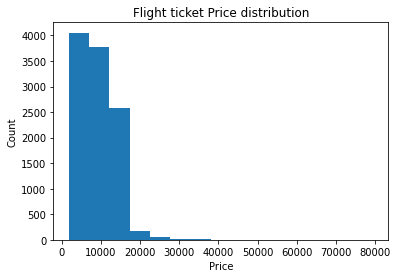

In [ ]:
#plotting flight price distribution
plt.hist(flight_df.Price, bins=15)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Flight ticket Price distribution')
plt.show()

In [ ]:
flight_df['Price'].mean()

9087.21456656057

In [ ]:
flight_df['Price'].median()

8372.0

The flight price distribution is right-skewed with majority of the flight tickets falling in the price range of 1000 - 5000. 

In [ ]:
flight_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

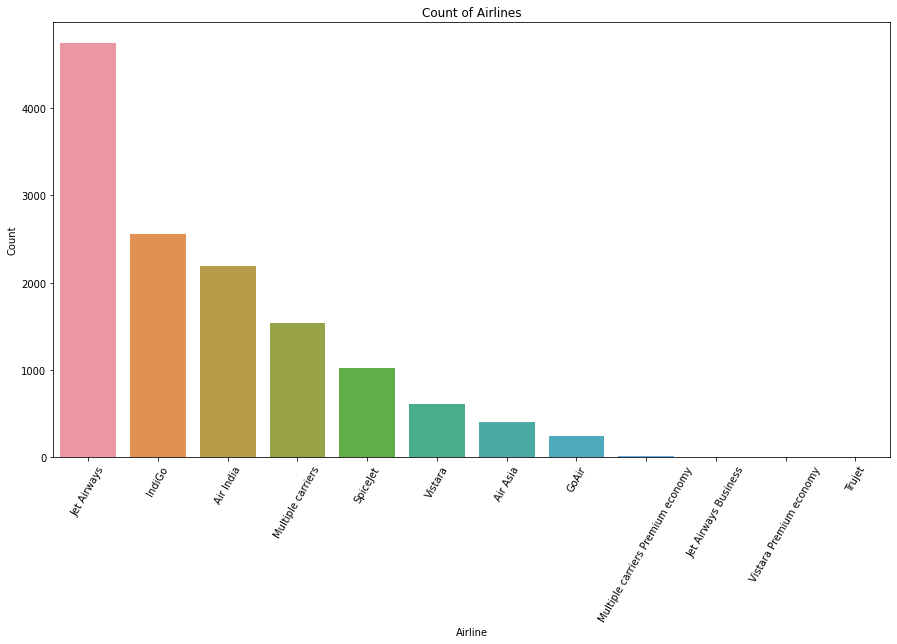

In [ ]:
# visualize the airline count distribution

plt.figure(figsize = (15, 8))
sns.countplot(x= 'Airline', data= flight_df, order=flight_df['Airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Count of Airlines')
plt.xticks(rotation=60)
plt.show()

From the visualization above, Jet Airways has the highest number of occurences while Trujet has the least. The top five airlines used by travellers are Jet Airways, Indigo, Air India, Multiple carriers and SpiceJet.

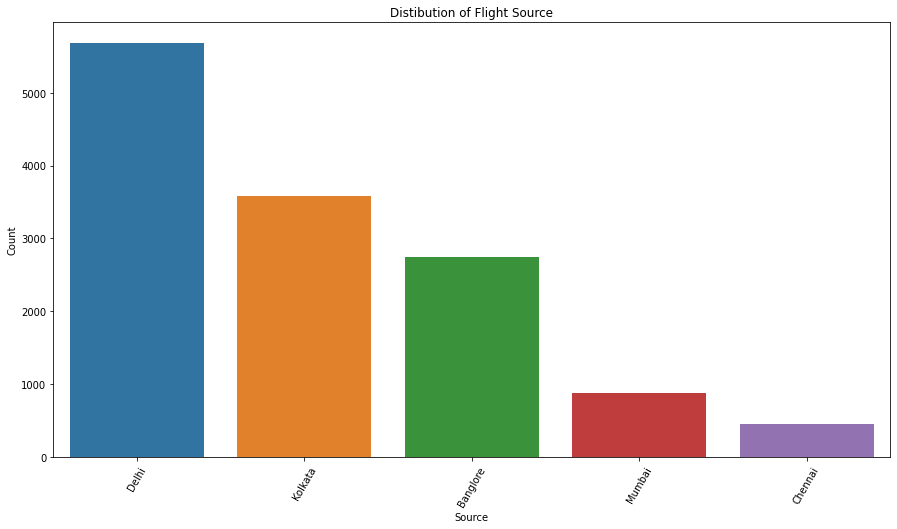

In [ ]:
# visualize the Source count distribution

plt.figure(figsize = (15, 8))
sns.countplot(x= 'Source', data= flight_df, order=flight_df['Source'].value_counts().index)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distibution of Flight Source')
plt.xticks(rotation=60)
plt.show()

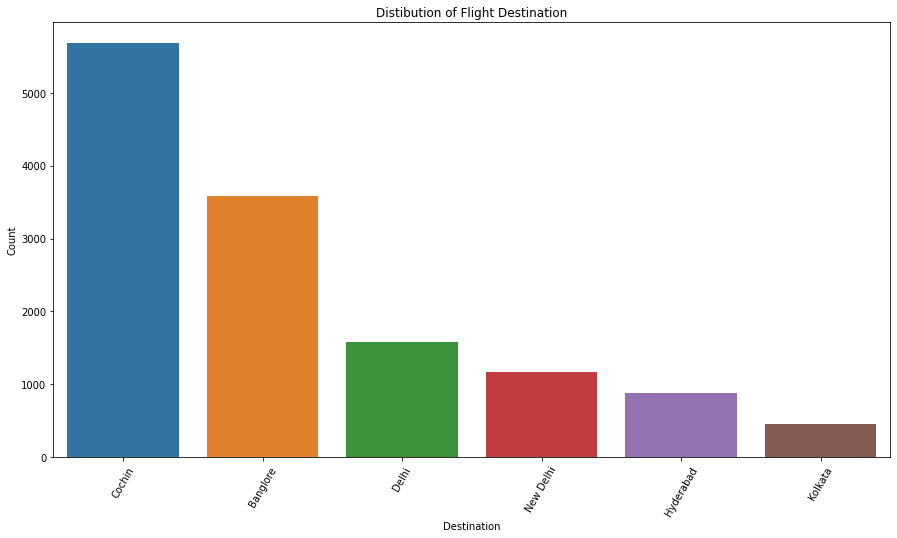

In [ ]:
# visualize the Destination count distribution

plt.figure(figsize = (15, 8))
sns.countplot(x= 'Destination', data= flight_df, order=flight_df['Destination'].value_counts().index)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Distibution of Flight Destination')
plt.xticks(rotation=60)
plt.show()

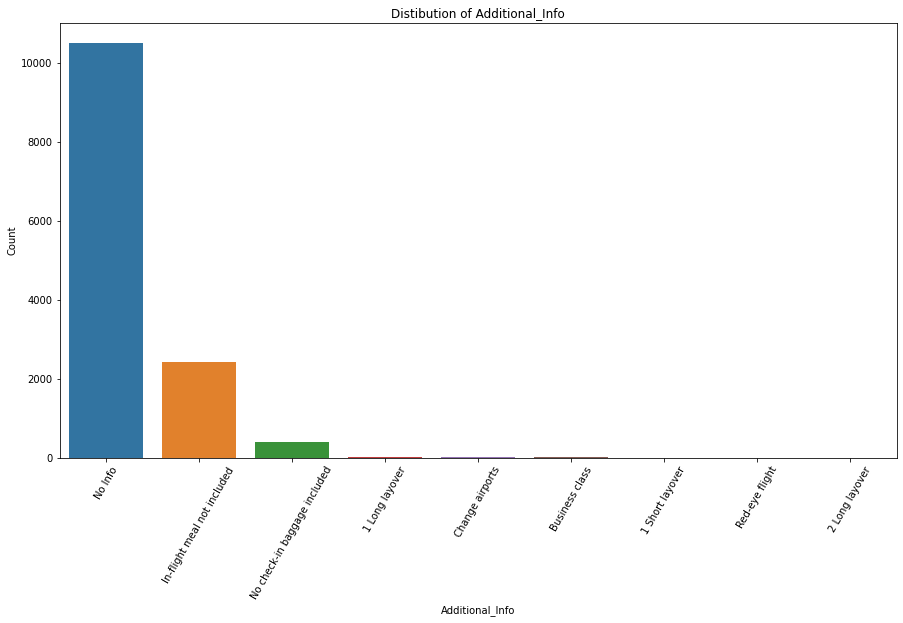

In [ ]:
# visualize the Additional_info count distribution

plt.figure(figsize = (15, 8))
sns.countplot(x= 'Additional_Info', data= flight_df, order=flight_df['Additional_Info'].value_counts().index)
plt.xlabel('Additional_Info')
plt.ylabel('Count')
plt.title('Distibution of Additional_Info')
plt.xticks(rotation=60)
plt.show()

# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label encoding categorical columns- Airline, Source. Route(1,2,3,4,5), Additional_Info, Destination

columns = ['Additional_Info', 'Destination', 'Airline', 'Source', 'Destination', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']

for x in columns:
  if x in flight_df.columns:
    flight_df[x] = LabelEncoder().fit_transform(flight_df[x])

flight_df.head()

,Airline,Source,Destination,Duration (in mins),Total_Stops,Additional_Info,Price,Arrival_Time (Hr),Arrival_Time (mins),Dep_Time (Hr),Dep_Time (mins),Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,3,0,5,170,0,6,3897.0,1,10,22,20,24,3,2019,0,13,30,13,5
1,1,3,0,445,2,6,7662.0,13,15,5,50,1,5,2019,2,25,1,3,5
2,4,2,1,1140,2,6,13882.0,4,25,9,25,9,6,2019,3,32,4,5,5
3,3,3,0,325,1,6,6218.0,23,30,18,5,12,5,2019,2,34,3,13,5
4,3,0,5,285,1,6,13302.0,21,35,16,50,1,3,2019,0,34,8,13,5


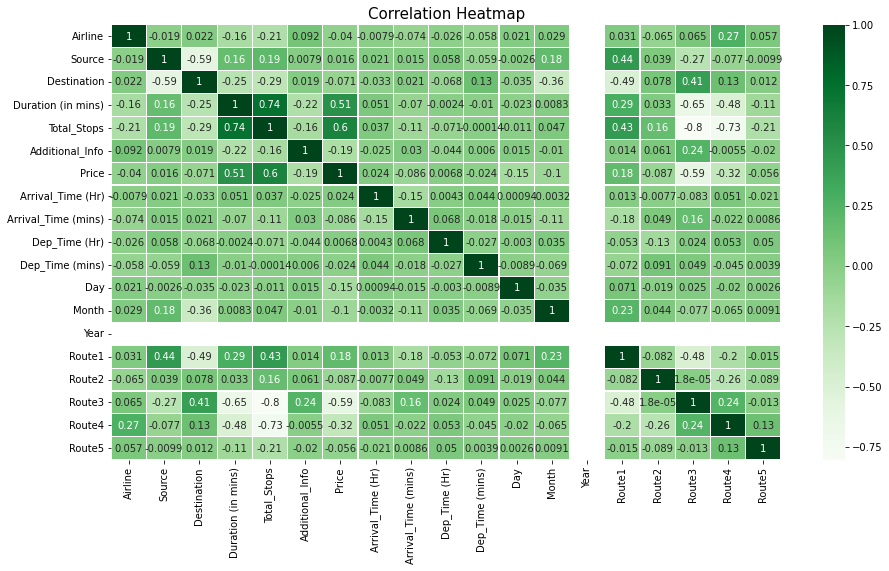

In [ ]:
#checking for correlation
C = flight_df.corr()

# correlation heatmap

plt.figure(figsize = (15, 8))
g = sns.heatmap(C, annot = True, cmap = 'Greens', linewidths = 0.1)
plt.title('Correlation Heatmap', size = 15)
plt.show()

# MODEL TESTING AND EVALUATION


In [ ]:
flight_df.head()

,Airline,Source,Destination,Duration (in mins),Total_Stops,Additional_Info,Price,Arrival_Time (Hr),Arrival_Time (mins),Dep_Time (Hr),Dep_Time (mins),Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,3,0,5,170,0,6,3897.0,1,10,22,20,24,3,2019,0,13,30,13,5
1,1,3,0,445,2,6,7662.0,13,15,5,50,1,5,2019,2,25,1,3,5
2,4,2,1,1140,2,6,13882.0,4,25,9,25,9,6,2019,3,32,4,5,5
3,3,3,0,325,1,6,6218.0,23,30,18,5,12,5,2019,2,34,3,13,5
4,3,0,5,285,1,6,13302.0,21,35,16,50,1,3,2019,0,34,8,13,5


In [ ]:
#splitting the dataset into our intial train and test sets
flight_df = flight_df.drop(columns=['Year'])
train_df = flight_df[0:10682]
test_df = flight_df[10682:]

In [ ]:
train_df.shape

(10682, 18)

In [ ]:
test_df.drop(columns=['Price'])
test_df.shape

(2671, 18)

In [ ]:
#specifying X and y
X = train_df.drop(columns=['Price'])
y = train_df.Price

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3, random_state=1)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

L_flight_model = LinearRegression()

L_flight_model.fit(train_X,train_y)

L_y_pred = L_flight_model.predict(test_X)

print("Mean_absoloute_score is: ",  mean_absolute_error(L_y_pred, test_y))
print("R_squared scoe is: ",r2_score(L_y_pred, test_y))

Mean_absoloute_score is:  2273.240272126345
R_squared scoe is:  0.11392865472136104


RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

Rg_flight_model = Ridge(random_state=1)

Rg_flight_model.fit(train_X,train_y)

Rg_y_pred = Rg_flight_model.predict(test_X)

print("Mean_absoloute_score is: ",  mean_absolute_error(Rg_y_pred, test_y))
print("R_squared scoe is: ",r2_score(Rg_y_pred, test_y))

Mean_absoloute_score is:  2273.1522840700013
R_squared scoe is:  0.11373660426127341


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
flight_model = DecisionTreeRegressor(random_state=1)

In [ ]:
flight_model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred = flight_model.predict(test_X)

In [ ]:
print("Mean_absoloute_score is: ",  mean_absolute_error(y_pred, test_y))
print("R_squared scoe is: ",r2_score(y_pred, test_y))

Mean_absoloute_score is:  756.6555382215289
R_squared scoe is:  0.7655015090905088


RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_flight_model = RandomForestRegressor(random_state=1)

RF_flight_model.fit(train_X,train_y)

RF_y_pred = RF_flight_model.predict(test_X)

print("Mean_absoloute_score is: ",  mean_absolute_error(RF_y_pred, test_y))
print("R_squared scoe is: ",r2_score(RF_y_pred, test_y))

Mean_absoloute_score is:  634.1555849935729
R_squared scoe is:  0.8753505529824029


LIGHTGBM REGRESSION

In [ ]:
from lightgbm import LGBMRegressor

lgb_flight_model = LGBMRegressor(random_state=1)

lgb_flight_model.fit(train_X,train_y)

lg_y_pred = lgb_flight_model.predict(test_X)

print("Mean_absoloute_score is: ",  mean_absolute_error(lg_y_pred, test_y))
print("R_squared scoe is: ",r2_score(lg_y_pred, test_y))


Mean_absoloute_score is:  823.8744841062462
R_squared scoe is:  0.870839732114578


# USING SMOGN ON PRICE 

Earlier, when plotting the price distribution in the dataset, it could be observed that Price was skewed. SMOGN is an alternative to log normalization when treating skewness in a response variable. 

In [ ]:
!pip install smogn
import smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
flight_smogn = smogn.smoter(data=train_df, y = 'Price')

r_index: 100%|##########| 481/481 [00:01<00:00, 333.96it/s]


In [ ]:
#specifying X and y
X_1 = flight_smogn.drop(columns=['Price'])
y_1 = flight_smogn.Price

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_1, y_1,test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_smogn_model = RandomForestRegressor(random_state=1)

RF_smogn_model.fit(train_X,train_y)

Rsmogn_y_pred = RF_smogn_model.predict(test_X)

print("Mean_absoloute_score is: ",  mean_absolute_error(Rsmogn_y_pred, test_y))
print("R_squared score is: ",r2_score(Rsmogn_y_pred, test_y))

Mean_absoloute_score is:  1458.9539401588777
R_squared scoe is:  0.8823956626514351


In [63]:
Rsmogn_y_pred = RF_smogn_model.predict(test_df.drop(columns=['Price']))
Rsmogn_y_pred 

array([14939.1723863 ,  4299.59      , 12864.73687426, ...,
       19236.57580023, 15627.95039373,  8395.86      ])